In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split


In [2]:
pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\91733\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
from matplotlib import pyplot as plt

In [7]:
cs = pd.read_csv('Car_sales.csv')

In [8]:
cs.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [9]:
cs.shape

(157, 16)

In [10]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [11]:
cs.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [12]:
cs.Manufacturer.value_counts()

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [13]:
cs.Vehicle_type.value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [28]:
!pip install markupsafe

In [14]:
report = pf.ProfileReport(cs)
report.to_file('profile_report.html')

NameError: name 'pf' is not defined

In [16]:
cs.drop(columns = ['Manufacturer','Model'],axis=1, inplace=True)

KeyError: "['Manufacturer', 'Model'] not found in axis"

In [17]:
cs.drop(columns = ['Latest_Launch'],axis=1, inplace=True)

In [18]:
def missing_treat(x):
    if ((x.dtype == 'float64') | (x.dtype == 'int64')):
        x = x.fillna(x.median())
    elif (x.dtype == 'object'):
        x = x.fillna(x.mode()[0])
    else:
        x
    return x

In [19]:
cs = cs.apply(missing_treat)

In [20]:
def outlier_treat(x):
    if ((x.dtype == 'float64') | (x.dtype == 'int64')):
        x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [24]:
cs = cs.apply(outlier_treat)

In [26]:
cs.Vehicle_type.value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [30]:
df1 = pd.get_dummies(cs, columns = ['Vehicle_type'],drop_first= True)

In [31]:
df1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,14.180,24.400,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,1
153,15.245,14.180,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,1
154,17.531,14.180,28.800,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,1
155,3.493,14.180,45.500,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,1


In [32]:
df1.apply(lambda x: x.std()/x.mean())

Sales_in_thousands        1.124826
four_year_resale_value    0.575344
Price_in_thousands        0.509564
Engine_size               0.320857
Horsepower                0.282466
Wheelbase                 0.068058
Width                     0.047422
Length                    0.069220
Curb_weight               0.182801
Fuel_capacity             0.211078
Fuel_efficiency           0.166435
Power_perf_factor         0.308328
Vehicle_type_Passenger    0.596418
dtype: float64

<AxesSubplot:ylabel='Frequency'>

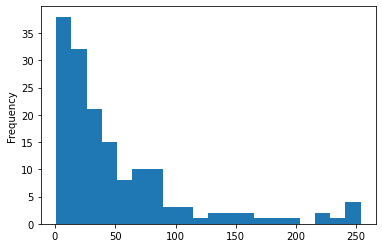

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
df1.Sales_in_thousands.plot(kind='hist', bins=20)

In [34]:
import seaborn as sns

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

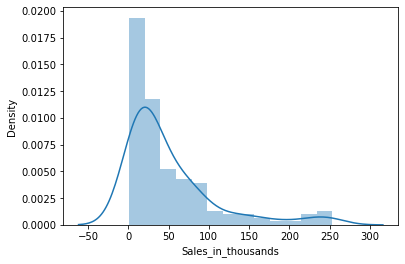

In [35]:
sns.distplot(df1.Sales_in_thousands)

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

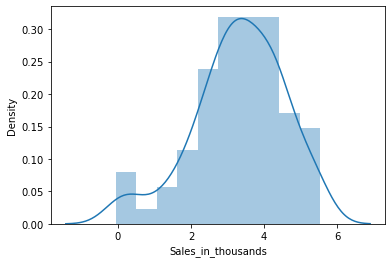

In [36]:
sns.distplot(np.log(df1.Sales_in_thousands))

In [37]:
df1['ln_Sales_in_thousands'] =np.log(df1.Sales_in_thousands)

In [38]:
corr = df1.corrwith(df1.ln_Sales_in_thousands)

In [39]:
corr

Sales_in_thousands        0.800740
four_year_resale_value   -0.446747
Price_in_thousands       -0.578149
Engine_size              -0.121511
Horsepower               -0.400655
Wheelbase                 0.266461
Width                     0.037459
Length                    0.205235
Curb_weight              -0.052293
Fuel_capacity            -0.020449
Fuel_efficiency           0.136004
Power_perf_factor        -0.447719
Vehicle_type_Passenger   -0.272476
ln_Sales_in_thousands     1.000000
dtype: float64

In [40]:
corr.to_csv('corr.csv')

In [64]:
var_corr = [
'four_year_resale_value',
'Engine_size',
'Horsepower',
'Wheelbase',
'Width',
'Length',
'Curb_weight',
'Fuel_capacity',
'Fuel_efficiency',
'Power_perf_factor',
'Vehicle_type_Passenger',
]

In [65]:
from sklearn.feature_selection import f_regression, RFE, SelectKBest   #F-Regression, RFE, SelectKBest

In [66]:
df1.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger,ln_Sales_in_thousands
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1,2.828437
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,1,3.673360
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917,1,2.647167
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,1,2.150366
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1,3.015388


In [67]:
X = df1[df1.columns.difference(['ln_Sales_in_thousands', 'Sales_in_thousands'])]

In [68]:
X.columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Power_perf_factor', 'Price_in_thousands',
       'Vehicle_type_Passenger', 'Wheelbase', 'Width',
       'four_year_resale_value'],
      dtype='object')

In [69]:
y = df1.ln_Sales_in_thousands

In [70]:
F_values, p_values = f_regression(X, y )

In [71]:
f_reg_results = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)
f_reg_results.columns = ['Feature', 'F_value', 'P_Value']

In [72]:
f_reg_results.sort_values(by='F_value',ascending = False,inplace = True)

In [73]:
f_reg_results

,Feature,F_value,P_Value
7,Price_in_thousands,77.822245,2.213079e-15
6,Power_perf_factor,38.859694,4.121695e-09
11,four_year_resale_value,38.648956,4.493399e-09
4,Horsepower,29.639108,1.997506e-07
8,Vehicle_type_Passenger,12.430568,5.556427e-04
9,Wheelbase,11.846315,7.428300e-04
5,Length,6.815897,9.921784e-03
3,Fuel_efficiency,2.921081,8.943070e-02
1,Engine_size,2.322859,1.295233e-01
0,Curb_weight,0.425017,5.154097e-01


In [74]:
var_f_reg = f_reg_results[f_reg_results.P_Value<0.01].Feature.values

In [75]:
var_f_reg

array(['Price_in_thousands', 'Power_perf_factor',
       'four_year_resale_value', 'Horsepower', 'Vehicle_type_Passenger',
       'Wheelbase', 'Length'], dtype=object)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [77]:
# RFE - Recursive Feature Elimination
RFE_Model = RFE(estimator = RandomForestRegressor(), n_features_to_select=10).fit(X, y)

In [78]:
RFE_Model.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True])

In [79]:
var_rfe = X.columns[RFE_Model.get_support()]

In [80]:
var_rfe

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Horsepower', 'Length',
       'Power_perf_factor', 'Price_in_thousands', 'Wheelbase', 'Width',
       'four_year_resale_value'],
      dtype='object')

In [81]:
from sklearn.feature_selection import SelectKBest, f_oneway #SelectKBest

In [82]:
SKB = SelectKBest(f_oneway, k=10).fit(X, y )

SKB.get_support()
vars_SKB = list(X.columns[SKB.get_support()])

In [83]:
vars_SKB

['Fuel_capacity',
 'Fuel_efficiency',
 'Horsepower',
 'Length',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'Width',
 'four_year_resale_value']

In [84]:
final_list = list(set(var_corr + list(var_f_reg) + list(var_rfe) +list(vars_SKB)))

In [85]:
final_list

['Engine_size',
 'Horsepower',
 'Width',
 'Vehicle_type_Passenger',
 'Curb_weight',
 'Fuel_capacity',
 'Power_perf_factor',
 'Length',
 'Wheelbase',
 'four_year_resale_value',
 'Fuel_efficiency',
 'Price_in_thousands']

In [86]:
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
X_final = X[final_list].drop(columns=['Power_perf_factor','Length','four_year_resale_value','Curb_weight','Price_in_thousands','Width','Fuel_capacity'], axis=1)

In [134]:
X_final.shape[1]

5

In [135]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(0, X_final.shape[1])]
vif["features"] = X_final.columns

In [136]:
vif.sort_values(by='VIF', ascending=False)

,VIF,features
3,145.926760,Wheelbase
4,84.853272,Fuel_efficiency
0,51.306242,Engine_size
1,48.085344,Horsepower
2,8.396856,Vehicle_type_Passenger


In [91]:
df_final = pd.concat([X_final, y], axis=1)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
train, test = train_test_split(df_final, test_size = 0.3, random_state=123)

In [94]:
train.shape

(109, 13)

In [95]:
test.shape

(48, 13)

In [96]:
train.columns

Index(['Engine_size', 'Horsepower', 'Width', 'Vehicle_type_Passenger',
       'Curb_weight', 'Fuel_capacity', 'Power_perf_factor', 'Length',
       'Wheelbase', 'four_year_resale_value', 'Fuel_efficiency',
       'Price_in_thousands', 'ln_Sales_in_thousands'],
      dtype='object')

In [97]:
import statsmodels.formula.api as smf

In [98]:
eqn = 'ln_Sales_in_thousands~'+'+'.join(train.columns.difference(['Engine_size', 'Horsepower', 'Width', 'Vehicle_type_Passenger',
       'Curb_weight', 'Fuel_capacity', 'Power_perf_factor', 'Length',
       'Wheelbase', 'four_year_resale_value', 'Fuel_efficiency',
       'Price_in_thousands']))

In [99]:
model_ols = smf.ols(eqn, train).fit()

In [100]:
print(model_ols.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.736e+32
Date:                   Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                           11:17:32   Log-Likelihood:                 3608.8
No. Observations:                    109   AIC:                            -7214.
Df Residuals:                        107   BIC:                            -7208.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [101]:
ln_pred_test = model_ols.predict(test)
ln_pred_train = model_ols.predict(train)

In [102]:
MAPE_train = np.mean(np.abs(train.ln_Sales_in_thousands - ln_pred_train)/train.ln_Sales_in_thousands)

In [103]:
MAPE_train

-7.879711249357802e-16

In [104]:
MAPE_test = np.mean(np.abs(test.ln_Sales_in_thousands - ln_pred_test)/test.ln_Sales_in_thousands)

In [105]:
MAPE_test

7.605224940634486e-16